# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [2]:
import numpy as np
import pandas as pd

In [ ]:
### Здесь требуется загрузить датасет phones.csv ###

In [27]:
df = pd.read_csv("./data/phones.csv")
df["os"] = df["os"].apply(lambda x: 0 if x == "Android" else 1)
df.head()

,disk,os,price,year
0,64,0,7256,2016
1,128,0,7623,2015
2,64,0,1916,2010
3,512,1,15045,2017
4,16,0,4478,2013


In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

Задание 1: обучить модель регрессии

In [28]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[["disk", "os", "year"]]
y = df["price"]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

pd.DataFrame(zip(X.columns, model.coef_), columns = ["название признака", "вес"])

,название признака,вес
0,disk,10.382698
1,os,1400.075011
2,year,1012.585046


In [30]:
model.predict([[64, 0, 2016]])

array([7664.43620643])

Задание 2: обучить модель классификации

In [31]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[["disk", "price", "year"]]
y = df["os"]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

model.coef_

array([[ 0.14407864,  0.00025255, -0.01453556]])

In [36]:
model.predict([[64, 7256, 2016]])

array([0], dtype=int64)

Задание 3: обучить модель кластеризации

In [39]:
df["year"].unique()

array([2016, 2015, 2010, 2017, 2013, 2018, 2012, 2011, 2014], dtype=int64)

In [79]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[["disk", "price"]]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [83]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3).fit(X)
[c1, c2, c3] = cluster.cluster_centers_

c1, c2, c3

(array([ 212.17391304, 8323.32608696]),
 array([  410.66666667, 12896.83333333]),
 array([  70.4       , 3958.53333333]))

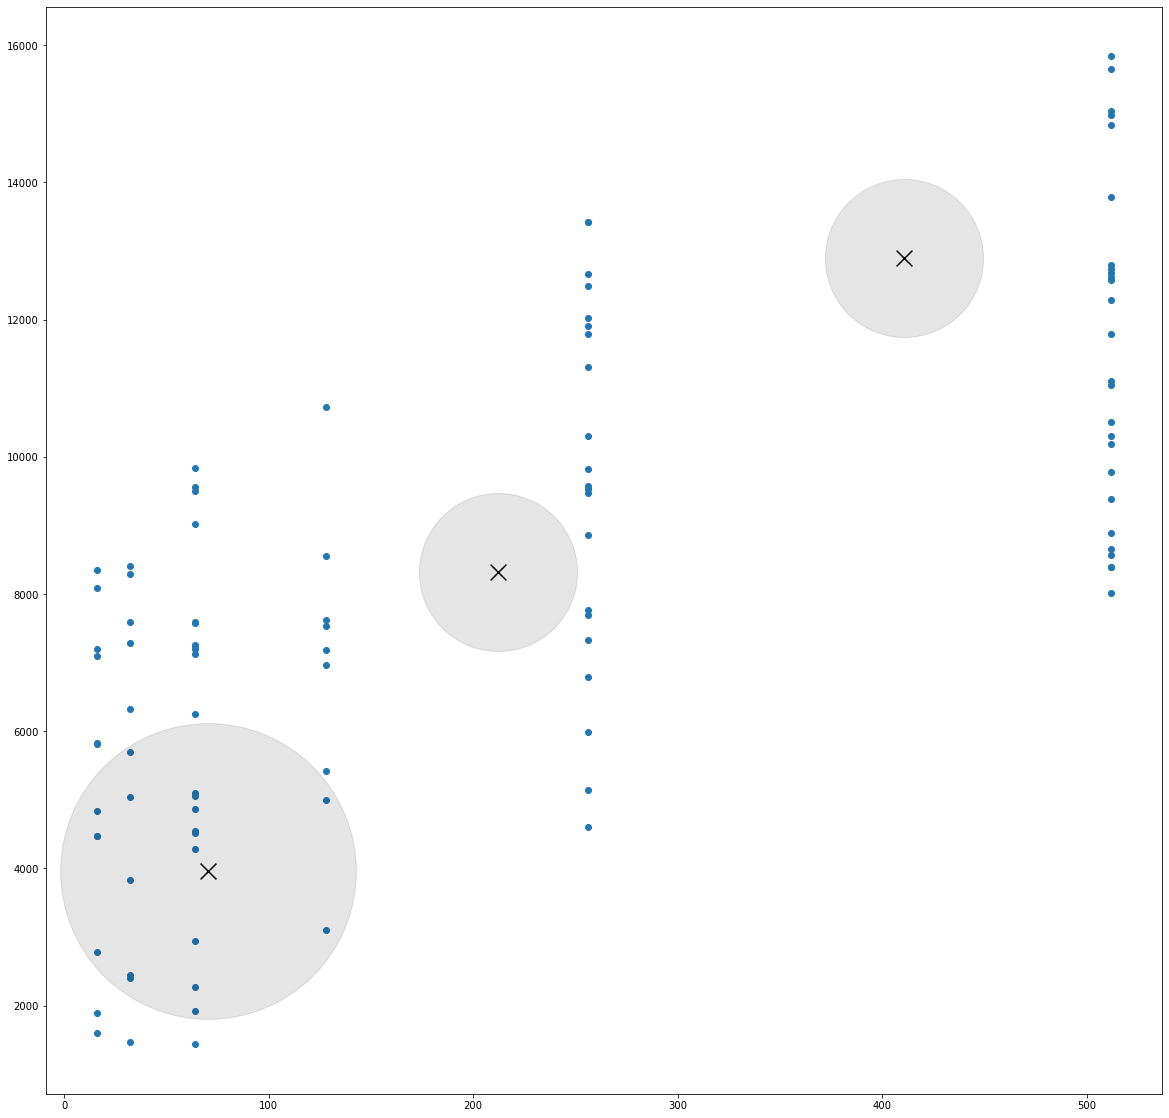

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))

# добавляем информацию о центрах кластеров
plt.scatter(X["disk"], X["price"])

plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

plt.show()

#P.S. Я не смог выбрать более подходящую пару для визуализации